# GDP Data Exploration

In [2]:
import AidUtilities as aid_utils
import AidUtilities.utilities as utils

In [3]:
from importlib import reload

In [4]:
reload(utils)

<module 'AidUtilities.utilities' from '/home/gsandoval/Documents/Classes/depaul/Korea/Foreign_Aid/AidUtilities/utilities.py'>

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
from time import sleep

In [91]:
import warnings

In [92]:
warnings.filterwarnings('ignore')

In [120]:
data_path = '/home/gsandoval/Documents/Classes/depaul/Korea/Data/'+\
            'WorldBank_GDP/LatinAmericaKorea_GDP_BySeries/LatAmKorea_GDP_Data.txt'
gdp_data = pd.read_csv(data_path, sep='\t', skipfooter=5)

In [121]:
gdp_data.head(2)

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,12.904163,...,6.998734,5.781744,6.052918,6.712704,5.156686,6.264566,5.231622,4.537879,5.111017,5.932404
1,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,11.650448,13.425592,13.711682,13.723112,12.925764,11.099008,11.199907,9.557799,8.967972,10.709978


In [122]:
gdp_data = utils.clean_col_names(gdp_data)

In [123]:
gdp_data.head(2)

,Series_Name,Series_Code,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,12.904163,...,6.998734,5.781744,6.052918,6.712704,5.156686,6.264566,5.231622,4.537879,5.111017,5.932404
1,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,11.650448,13.425592,13.711682,13.723112,12.925764,11.099008,11.199907,9.557799,8.967972,10.709978


In [124]:
def create_series_names(series_names, return_tuple=False):
    '''Designed to take in World Bank dataframe with multiple series(studies).
    Then ask for user input on what the new series name should be.
    If "quit" is entered as a value, the function exits and returns input values to that point.
    Args:
        series_names(pandas.series): expects a series of world bank series
        return_tuple(bool): 
            if True--returns a list of tuples. 
                the tuples contain (old_series_name, new_series_name)
            if False-- returns a list of strings that correspond to 
                the new name for each series
    Returns:
        List of either string elements of tuples.  The return object is based on return_tuple value.
    '''
    new_series_names = []
    for series in series_names:
        print(series)
        new_name = input('new name: ')
        if new_name == 'quit':
            return print(new_series_names)
        # return a list of tuples. 
        if return_tuple:
            new_series_names.append((old_series, new_name))
        else:
            new_series_names.append(new_name)
    return new_series_names

In [125]:
series_names = gdp_data.Series_Name.unique()
series_codes = gdp_data.Series_Code.unique()
print(len(series_codes))

51


In [126]:
# This is used to decide what to re-name the Series Name 
#utils.create_series_names(series_names)

In [127]:
new_series_names = [
    'AggForestFish_PctGDP', 'GovtDebt_Total', 'CoalRents_PctGDP',
    'HealthExp_PctGDP', 'Cred2Private_PctGDP', 'GovtHealth_PctGDP',
    'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP', 'ForeignInvstOutflow_PctGDP',
    'GDP_2015USD', 'GDP_LCU_current', 'GDP_PctGrowth', 'PerCapita_GDP_LCU',
    'PerCapita_GDP_USD', 'PerEmployed_GDP_2017PPP', 'EnergyUnit_GDP_PPP',
    'GovtConsumption_PctGDP', 'DomSavings_PctGDP', 'Savings_PctGDP',
    'ImportGoodService_PctGDP', 'Inflation_Pct', 'Manufacturing_PctGDP',
    'MerchTrade_PctGDP', 'Mineral_PctGDP', 'NatGas_PctGDP',
    'Lend(+)Borrow(-)_PctGDP', 'Remittance_PctGDP', 'RevenueExGrants_PctGDP',
    'StocksTraded_PctGDP', 'NatResourcRents_PctGDP', 'InServiceTrade_PctGDP',
    'BroadMoney_PctGDP', 'CurrentAcctBal_PctGDP', 'CreditByFin_PctGDP', 'CreditByBanks_PctGDP',
    'Expense_PctGDP', 'ForeignInvstInflow_PctGDP', 'ForestRents_PctGDP',
    'GDP_LCU', 'GDP_USD', 'PerCapita_GDP_2015USD', 'PerCapita_GDP_LCU_current',
    'GDPGrowth_Pct', 'EducExp_PctGDP', 'Industry_PctGDP',
    'Defense_PctGDP', 'OilRents_PctGDP', 'RnD_PctGDP',
    'Services_PctGDP', 'Trade_PctGDP', 'TaxRev_PctGDP']

In [128]:
print(len(set(new_series_names)))
print(len(set(series_names)))

51
51


In [129]:
# merge old series names with new seires names
series_pairs = [(a, b) for a, b in zip(series_names, new_series_names)]
print(len(series_pairs))

count = 0
for a, b, c in zip(series_codes, series_names, new_series_names):
    if count == 0:
        print(f'   {"Series Code":>11}\t{"Series Name": ^60}\t{"New Name": ^}')
    print(f'{count:<2}.{a:<11}\t{b: <60}\t{c: <}')
    count += 1


51
   Series Code	                        Series Name                         	New Name
0 .NV.AGR.TOTL.ZS	Agriculture, forestry, and fishing, value added (% of GDP)  	AggForestFish_PctGDP
1 .GC.DOD.TOTL.GD.ZS	Central government debt, total (% of GDP)                   	GovtDebt_Total
2 .NY.GDP.COAL.RT.ZS	Coal rents (% of GDP)                                       	CoalRents_PctGDP
3 .SH.XPD.CHEX.GD.ZS	Current health expenditure (% of GDP)                       	HealthExp_PctGDP
4 .FS.AST.PRVT.GD.ZS	Domestic credit to private sector (% of GDP)                	Cred2Private_PctGDP
5 .SH.XPD.GHED.GD.ZS	Domestic general government health expenditure (% of GDP)   	GovtHealth_PctGDP
6 .NE.EXP.GNFS.ZS	Exports of goods and services (% of GDP)                    	ExportsGoodServices_PctGDP
7 .NE.CON.TOTL.ZS	Final consumption expenditure (% of GDP)                    	FinalConsumpExp_PctGDP
8 .BM.KLT.DINV.WD.GD.ZS	Foreign direct investment, net outflows (% of GDP)          	ForeignInvstOutflow_Pc

In [130]:
# this is to generate a csv file with codes
df_values = {'Series_Codes': series_codes, 'Series_Names': series_names, 'New_Series_Names': new_series_names}
series_names_ref = pd.DataFrame(df_values)

In [131]:
#series_names_ref.to_csv('Series_Names_Reference.csv', sep=',', index=False)

# Replace the old series names with the new ones

In [132]:
for a, b in series_pairs:
    gdp_data.loc[gdp_data['Series_Name']==a, 'Series_Name'] = b

In [133]:
gdp_data.head()

,Series_Name,Series_Code,Country_Name,Country_Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Argentina,ARG,NaN,NaN,NaN,NaN,NaN,12.904163,...,6.998734,5.781744,6.052918,6.712704,5.156686,6.264566,5.231622,4.537879,5.111017,5.932404
1,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Belize,BLZ,NaN,NaN,NaN,NaN,NaN,NaN,...,11.650448,13.425592,13.711682,13.723112,12.925764,11.099008,11.199907,9.557799,8.967972,10.709978
2,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Bolivia,BOL,NaN,NaN,NaN,NaN,NaN,NaN,...,9.769586,9.812162,9.966979,9.740218,10.239494,11.171875,11.589336,11.481924,12.221758,14.022787
3,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Brazil,BRA,15.7324,15.077575,16.095622,14.952728,16.025741,16.173058,...,4.342034,4.168328,4.506886,4.325611,4.319149,4.891354,4.600592,4.420399,4.401763,5.905569
4,AggForestFish_PctGDP,NV.AGR.TOTL.ZS,Cayman Islands,CYM,NaN,NaN,NaN,NaN,NaN,NaN,...,0.329024,0.330634,0.340974,0.357975,0.378694,0.399459,0.418316,0.408844,0.409761,NaN


In [134]:
print(len(gdp_data.Series_Name.unique()))
gdp_data.Series_Name.unique()

51


array(['AggForestFish_PctGDP', 'GovtDebt_Total', 'CoalRents_PctGDP',
       'HealthExp_PctGDP', 'Cred2Private_PctGDP', 'GovtHealth_PctGDP',
       'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP',
       'ForeignInvstOutflow_PctGDP', 'GDP_2015USD', 'GDP_LCU_current',
       'GDP_PctGrowth', 'PerCapita_GDP_LCU', 'PerCapita_GDP_USD',
       'PerEmployed_GDP_2017PPP', 'EnergyUnit_GDP_PPP',
       'GovtConsumption_PctGDP', 'DomSavings_PctGDP', 'Savings_PctGDP',
       'ImportGoodService_PctGDP', 'Inflation_Pct',
       'Manufacturing_PctGDP', 'MerchTrade_PctGDP', 'Mineral_PctGDP',
       'NatGas_PctGDP', 'Lend(+)Borrow(-)_PctGDP', 'Remittance_PctGDP',
       'RevenueExGrants_PctGDP', 'StocksTraded_PctGDP',
       'NatResourcRents_PctGDP', 'InServiceTrade_PctGDP',
       'BroadMoney_PctGDP', 'CurrentAcctBal_PctGDP', 'CreditByFin_PctGDP',
       'CreditByBanks_PctGDP', 'Expense_PctGDP',
       'ForeignInvstInflow_PctGDP', 'ForestRents_PctGDP', 'GDP_LCU',
       'GDP_USD', 'PerCapita_GD

# Explore Korea Data

In [ ]:
We will focus on examining Korea's GDP makeup over the years.
Korea should be the case study for steps Developing countries should do to grow into a Developed country.

In this section we will look at the correlation of GDP components and their correlation to overall GDP.  The GDP of Korea has grown significantly over the decades.  Looking at the correlation of GDP components may reveal which ones played a significant role in growing GDP. 

In [135]:
# Filter for just korea data
korea_data = gdp_data.loc[gdp_data['Country_Name']=="Korea, Rep."]

In [136]:
# Drop non essential columns
korea_data.drop(['Series_Code', 'Country_Code', 'Country_Name'], axis=1, inplace=True)
# Reset index to allow for easy Transpose
korea_data.set_index('Series_Name', inplace=True)

In [137]:
# Transpose data to simply for plotting
tkorea_data = korea_data.T

In [138]:
tkorea_data.describe()

Series_Name,AggForestFish_PctGDP,GovtDebt_Total,CoalRents_PctGDP,HealthExp_PctGDP,Cred2Private_PctGDP,GovtHealth_PctGDP,ExportsGoodServices_PctGDP,FinalConsumpExp_PctGDP,ForeignInvstOutflow_PctGDP,GDP_2015USD,...,PerCapita_GDP_LCU_current,GDPGrowth_Pct,EducExp_PctGDP,Industry_PctGDP,Defense_PctGDP,OilRents_PctGDP,RnD_PctGDP,Services_PctGDP,Trade_PctGDP,TaxRev_PctGDP
count,61.000000,13.000000,49.000000,20.000000,61.000000,20.000000,61.000000,61.000000,50.000000,6.100000e+01,...,6.100000e+01,60.000000,29.000000,61.000000,61.000000,49.000000,23.000000,61.000000,61.000000,48.000000
mean,13.422753,19.016631,0.085178,5.716182,67.490742,3.295436,27.904744,71.359701,0.888469,5.857699e+11,...,1.089791e+07,5.931253,3.474865,30.963622,3.958356,0.000316,3.032340,46.772442,57.430502,13.545178
std,12.779859,13.971548,0.158129,1.209867,46.410826,0.757400,13.144544,10.831589,0.806586,5.360306e+11,...,1.242666e+07,3.811507,0.805926,5.550134,1.463963,0.000563,0.830691,7.307252,21.698412,0.996754
min,1.667931,6.862980,0.000129,3.897594,5.743216,1.961563,2.621468,58.795080,0.009206,2.569943e+10,...,9.989456e+03,-5.811820,2.089250,17.329705,2.315474,0.000000,2.015670,29.849394,14.600176,10.475277
25%,2.619976,8.178937,0.001236,4.570272,34.280526,2.598177,23.654802,63.639549,0.203046,1.025125e+11,...,2.988487e+05,2.886108,3.018310,27.624699,2.499300,0.000000,2.262760,39.930630,48.759426,12.985778
50%,7.606496,9.993846,0.006678,5.849817,48.637518,3.466847,27.885682,66.331084,0.641400,4.014878e+11,...,4.678319e+06,6.033830,3.374240,33.220965,4.002304,0.000000,2.872580,46.486521,57.523038,13.477852
75%,24.172043,34.929859,0.084634,6.518965,112.651109,3.737489,36.445859,77.607512,1.786544,1.021193e+12,...,1.987043e+07,8.587972,3.739180,34.734840,4.878716,0.000384,3.900820,53.878916,69.215521,14.311736
max,46.526876,38.065514,0.610769,8.164165,164.779234,4.860005,54.094051,99.371648,2.466779,1.637850e+12,...,3.733354e+07,12.884442,6.329670,37.147720,7.157548,0.001778,4.527530,57.242151,105.566314,15.536384


In [139]:
columns = list(tkorea_data.columns)

In [ ]:
# plot the first 25 columns.  
# We do so becuase of the notebook limits on output
count = 0
for col in columns[:25]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col)
    count += 1
print(count)

In [ ]:
# Plot the remaining columns
count = 0
for col in columns[25:]:
    fig, ax = plt.subplots()
    tkorea_data[col].plot(ax=ax, title=col)
    count += 1
print(count)

In [141]:
select_series = ['AggForestFish_PctGDP', 'CoalRents_PctGDP',
       'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP',
       'PerCapita_GDP_USD',
       'ImportGoodService_PctGDP', 'Manufacturing_PctGDP',
       'Mineral_PctGDP', 'Remittance_PctGDP',
       'NatResourcRents_PctGDP', 'CurrentAcctBal_PctGDP', 
       'CreditByBanks_PctGDP', 'ForestRents_PctGDP',
       'Industry_PctGDP', 'Services_PctGDP', 'Trade_PctGDP',
       'GDP_USD']

# Not needed in correlation plot 'GDPGrowth_Pct', 

In [142]:
data = tkorea_data[select_series]

In [143]:
print(f'Num of years: {data.shape[0]}')
data.isna().sum()

Num of years: 61


Series_Name
AggForestFish_PctGDP           0
CoalRents_PctGDP              12
ExportsGoodServices_PctGDP     0
FinalConsumpExp_PctGDP         0
PerCapita_GDP_USD              0
ImportGoodService_PctGDP       0
Manufacturing_PctGDP           0
Mineral_PctGDP                11
Remittance_PctGDP             16
NatResourcRents_PctGDP        11
CurrentAcctBal_PctGDP         16
CreditByBanks_PctGDP           0
ForestRents_PctGDP            11
Industry_PctGDP                0
Services_PctGDP                0
Trade_PctGDP                   0
GDP_USD                        0
dtype: int64

In [52]:
import numpy as np

In [80]:
corr_data.shape[-1]
corr_data.iloc[-1]

Series_Name
AggForestFish_PctGDP         -0.729441
CoalRents_PctGDP             -0.511335
ExportsGoodServices_PctGDP    0.784154
FinalConsumpExp_PctGDP       -0.553747
PerCapita_GDP_USD             0.999018
ImportGoodService_PctGDP      0.704315
Manufacturing_PctGDP          0.653950
Mineral_PctGDP               -0.351620
Remittance_PctGDP            -0.487437
NatResourcRents_PctGDP       -0.594827
CurrentAcctBal_PctGDP         0.573542
CreditByBanks_PctGDP          0.948777
ForestRents_PctGDP           -0.618204
Industry_PctGDP               0.510649
Services_PctGDP               0.880572
Trade_PctGDP                  0.765483
GDP_USD                       1.000000
Name: GDP_USD, dtype: float64

[Text(0.5, 1.0, 'Correlation Plot')]

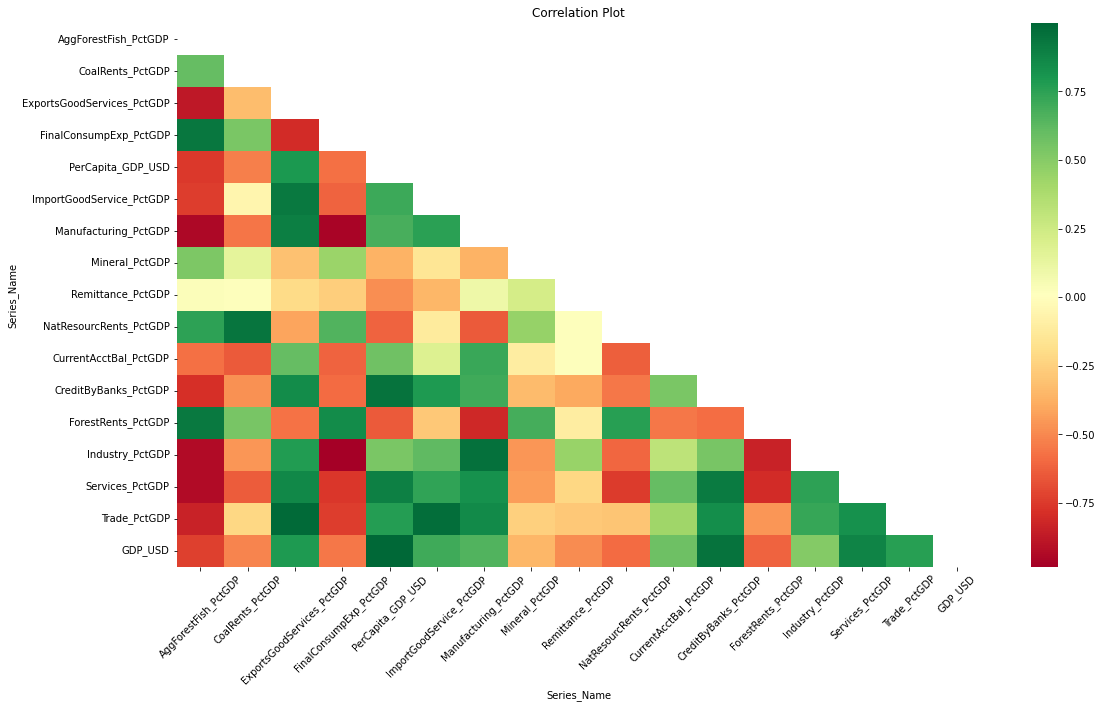

In [90]:
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18, 10))
corr_plot = sns.heatmap(corr_data, cmap='RdYlGn', mask = mask)#.set(title='Correlation Plot')
corr_plot.set_xticklabels(corr_plot.get_xticklabels(), rotation=45)
corr_plot.set(title='Correlation Plot')

## Thoughts on the correlation

I want to draw your focus on the last row of the above column. 
It is the row of Korea's GDP to the other variables.

In [48]:
corr_data = data.corr()
print(corr_data.columns)
print(corr_data.index)

Index(['AggForestFish_PctGDP', 'CoalRents_PctGDP',
       'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP',
       'PerCapita_GDP_USD', 'ImportGoodService_PctGDP', 'Manufacturing_PctGDP',
       'Mineral_PctGDP', 'Remittance_PctGDP', 'NatResourcRents_PctGDP',
       'CurrentAcctBal_PctGDP', 'CreditByBanks_PctGDP', 'ForestRents_PctGDP',
       'Industry_PctGDP', 'Services_PctGDP', 'Trade_PctGDP', 'GDP_USD'],
      dtype='object', name='Series_Name')
Index(['AggForestFish_PctGDP', 'CoalRents_PctGDP',
       'ExportsGoodServices_PctGDP', 'FinalConsumpExp_PctGDP',
       'PerCapita_GDP_USD', 'ImportGoodService_PctGDP', 'Manufacturing_PctGDP',
       'Mineral_PctGDP', 'Remittance_PctGDP', 'NatResourcRents_PctGDP',
       'CurrentAcctBal_PctGDP', 'CreditByBanks_PctGDP', 'ForestRents_PctGDP',
       'Industry_PctGDP', 'Services_PctGDP', 'Trade_PctGDP', 'GDP_USD'],
      dtype='object', name='Series_Name')


In [49]:
corr_to_GDP = corr_data.loc['GDP_US']

KeyError: 'GDP_US'